# World Happiness Project Report

In [10]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [11]:
#reading the csv files and listing the datas
df_happy = pd.read_csv(r"C:\Users\Premium\Downloads\happiness_score_dataset.csv")
df_happy.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


# By looking the datset we can see that it's a Linear Regression problem.

# DATA ANALYSIS

In [7]:
df_happy.count()

Country                          158
Region                           158
Happiness Rank                   158
Happiness Score                  158
Standard Error                   158
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         158
Freedom                          158
Trust (Government Corruption)    158
Generosity                       158
Dystopia Residual                158
dtype: int64

In [8]:
df_happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#  # this step helps to analyse the no. of enteries ,columns and mainly non-null counts.
## So there is no non-null value and it seems to be a very good dataset.

In [16]:
df_happy.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

#there are no null values seen

# STATISTICAL VALUES

In [17]:
df_happy.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## We can infer the values of mean,min and max values from the report.also from this statisctics we can see that factors like economy and family have good impact on the happiness scores when compared to other factors.

# UNIVARIANT ANAYLSIS using Boxplot

In [23]:
# I will check the different regions. 

df_happy.Region.unique()


array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [20]:
df_happy.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Happiness Rank                      AxesSubplot(0.125,0.653529;0.110714x0.226471)
Happiness Score                  AxesSubplot(0.257857,0.653529;0.110714x0.226471)
Standard Error                   AxesSubplot(0.390714,0.653529;0.110714x0.226471)
Economy (GDP per Capita)         AxesSubplot(0.523571,0.653529;0.110714x0.226471)
Family                           AxesSubplot(0.656429,0.653529;0.110714x0.226471)
Health (Life Expectancy)         AxesSubplot(0.789286,0.653529;0.110714x0.226471)
Freedom                             AxesSubplot(0.125,0.381765;0.110714x0.226471)
Trust (Government Corruption)    AxesSubplot(0.257857,0.381765;0.110714x0.226471)
Generosity                       AxesSubplot(0.390714,0.381765;0.110714x0.226471)
Dystopia Residual                AxesSubplot(0.523571,0.381765;0.110714x0.226471)
dtype: object

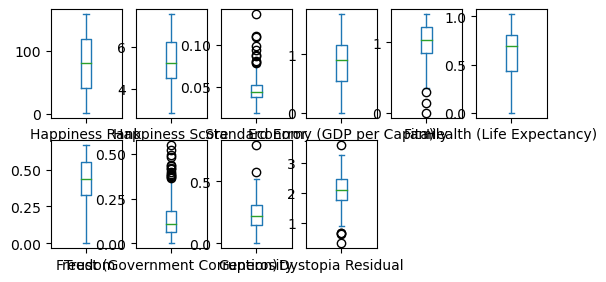

In [21]:
df_happy.plot(kind='box',subplots=True,layout=(3,6))

<AxesSubplot:>

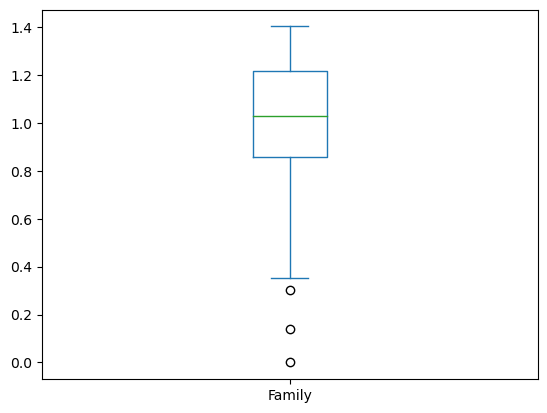

In [22]:
df_happy['Family'].plot.box()


<AxesSubplot:>

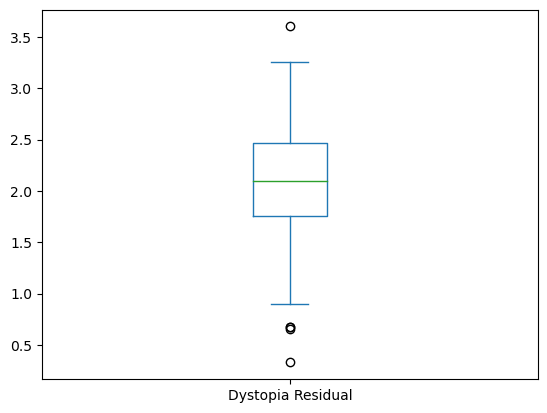

In [26]:
df_happy['Dystopia Residual'].plot.box()

<AxesSubplot:>

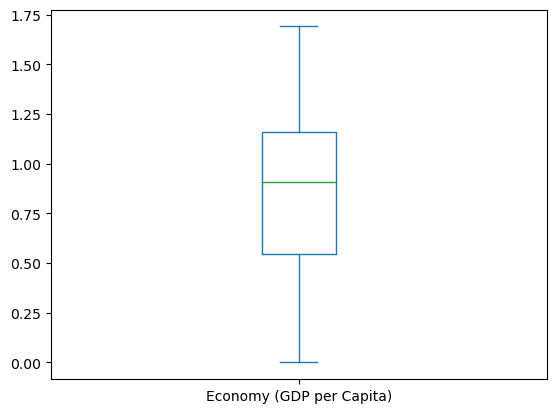

In [27]:
df_happy['Economy (GDP per Capita)'].plot.box()

# BIVARIANT analysis (scatter plots)

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

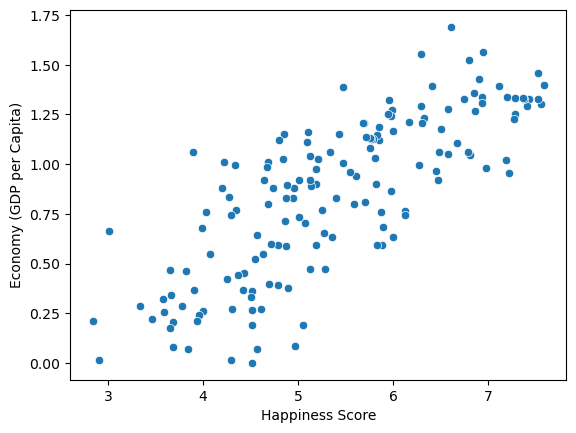

In [28]:
sns.scatterplot(data=df_happy,x='Happiness Score', y='Economy (GDP per Capita)')

<AxesSubplot:xlabel='Happiness Score', ylabel='Family'>

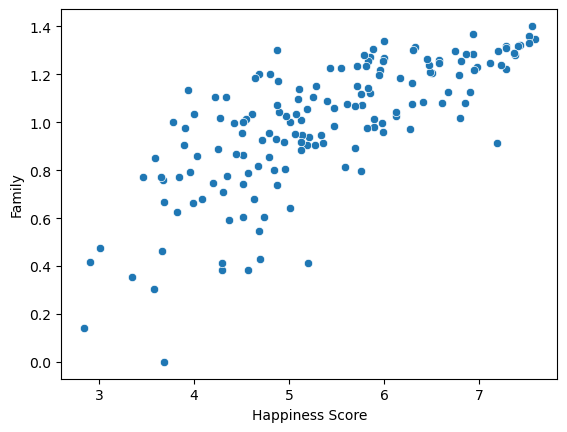

In [29]:
sns.scatterplot(data=df_happy,x='Happiness Score',y='Family')


<AxesSubplot:xlabel='Happiness Score', ylabel='Health (Life Expectancy)'>

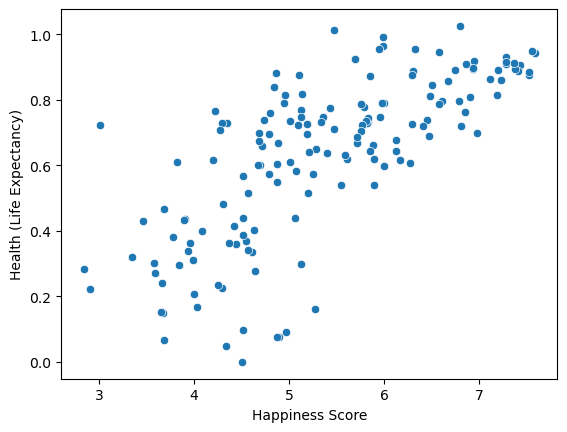

In [30]:
sns.scatterplot(data=df_happy,x='Happiness Score',y='Health (Life Expectancy)')

<AxesSubplot:xlabel='Happiness Score', ylabel='Dystopia Residual'>

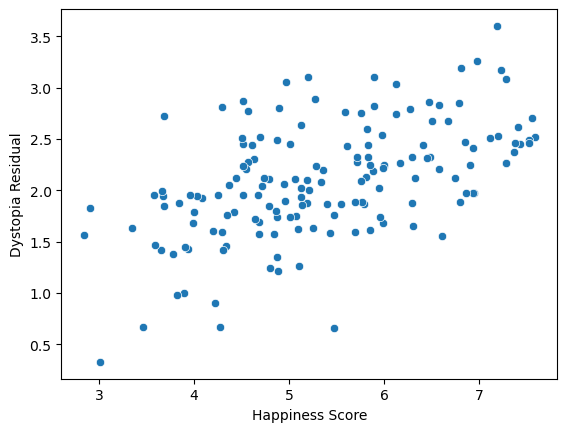

In [31]:
sns.scatterplot(data=df_happy,x='Happiness Score',y='Dystopia Residual')


# BARPLOT

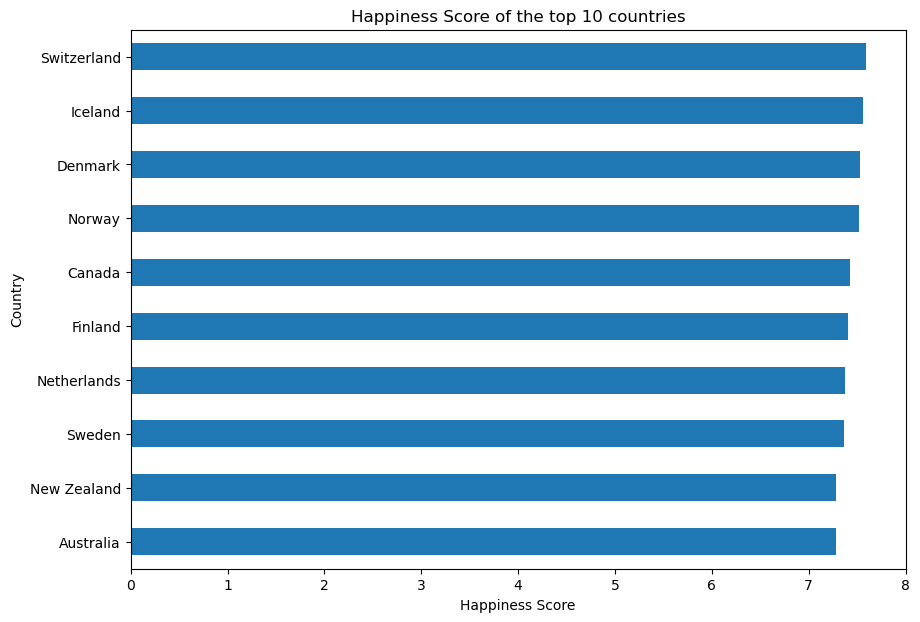

In [34]:
data_plot = df_happy.set_index('Country')
data_plot = data_plot[0:10]['Happiness Score']

fig, ax = plt.subplots(figsize = (10,7))                               # Plot sizes
bar_plot = data_plot.plot.barh()                                       # Horizontal bar plot "barh"
bar_plot.set_title('Happiness Score of the top 10 countries')
bar_plot.set_xlabel('Happiness Score')
bar_plot.invert_yaxis()                                                # The biggest to smallest
plt.xlim(0,8)                                                          # change x-axis limits

plt.show()

# MULTIVARIANT ANALYSIS

In [37]:
dfcor=df_happy.corr()
dfcor


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

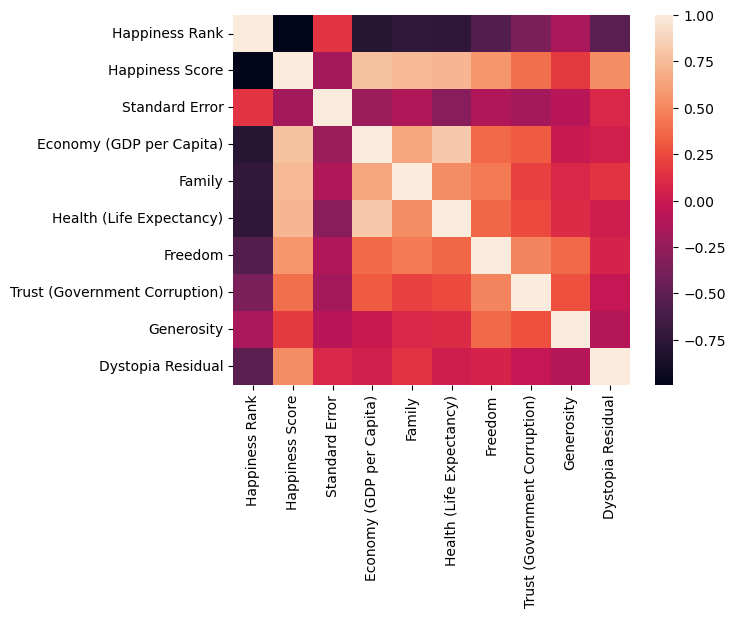

In [38]:
sns.heatmap(dfcor)


# correlation between the Happiness Score and each of the other variables

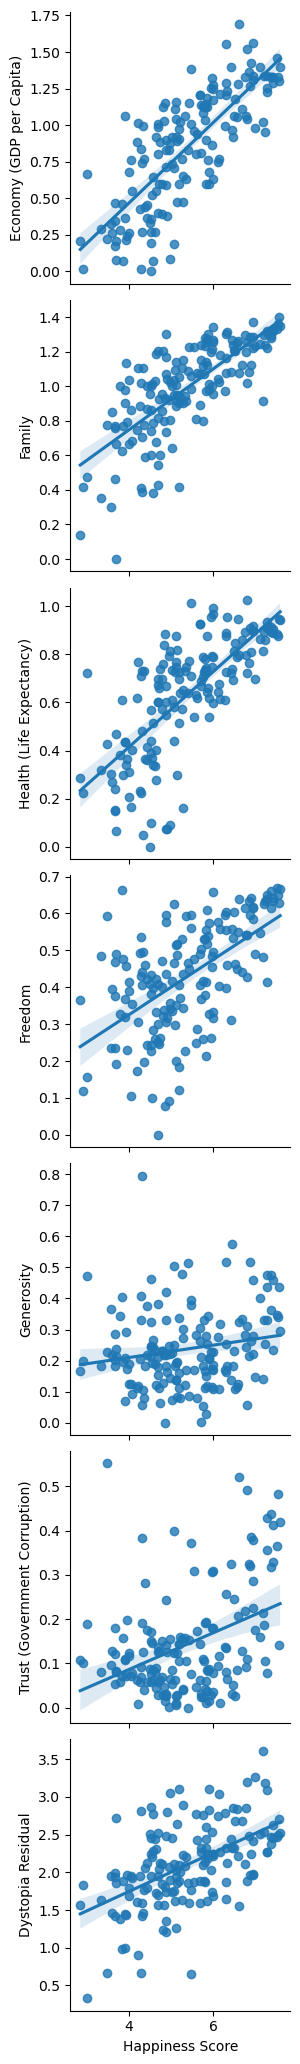

In [45]:
sns.pairplot(df_happy,kind='reg', x_vars = ['Happiness Score'], y_vars=['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Generosity','Trust (Government Corruption)','Dystopia Residual'], height=3)
plt.show()

## The variables with the highest correlation with Happines Score are based on Economy and Health

## SOrting top 10 Happiness Ranked countries.

In [46]:
list_Ten_Happiest = df_happy.sort_values(by = 'Happiness Rank')

list_Ten_Happiest.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


# Sorting Least 10 happines ranked countries

In [47]:
list_Ten_LeastHappy = df_happy.sort_values(by = 'Happiness Rank', ascending = False)

list_Ten_LeastHappy.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


# We are computing  the mean happiness score for each region and rank the regions from most happy to least happy

In [49]:
df_happy_mean = df_happy.groupby(['Region'])[['Happiness Score']].mean()

df_happy_mean.sort_values(by = 'Happiness Score', ascending = False)

,Happiness Score
Region,
Australia and New Zealand,7.285000
North America,7.273000
Western Europe,6.689619
Latin America and Caribbean,6.144682
Eastern Asia,5.626167
Middle East and Northern Africa,5.406900
Central and Eastern Europe,5.332931
Southeastern Asia,5.317444
Southern Asia,4.580857


# Conclusion


In conclusion, this project has provided a comprehensive analysis of happiness scores around the world, highlighting the importance of economic, social, and health factors in determining individual and social well-being. The findings suggest that promoting economic prosperity, social support networks, and access to healthcare can contribute to higher levels of happiness, while reducing corruption can help ensure that these gains are sustainable over time. By prioritizing happiness as a key goal for individuals, communities, and policymakers, we can work towards creating a world that is more just, equitable, and fulfilling for all.